In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm
import matplotlib.patches as patches
from sam_sat import *
from utils import plt2D
from Regions import *

sigma = 5.670367e-8

f = xr.open_dataset("All_2014_NCEP_1stprcesd_gridded.nc").load()
f.close()
f = f.where(f.CTRC != -999.)

f0 = xr.open_dataset("All_2014_NCEP_1stprcesd_prediction_gridded.nc").load()
f0.close()
f0 = f0.where(f0.CTRC != -999.)

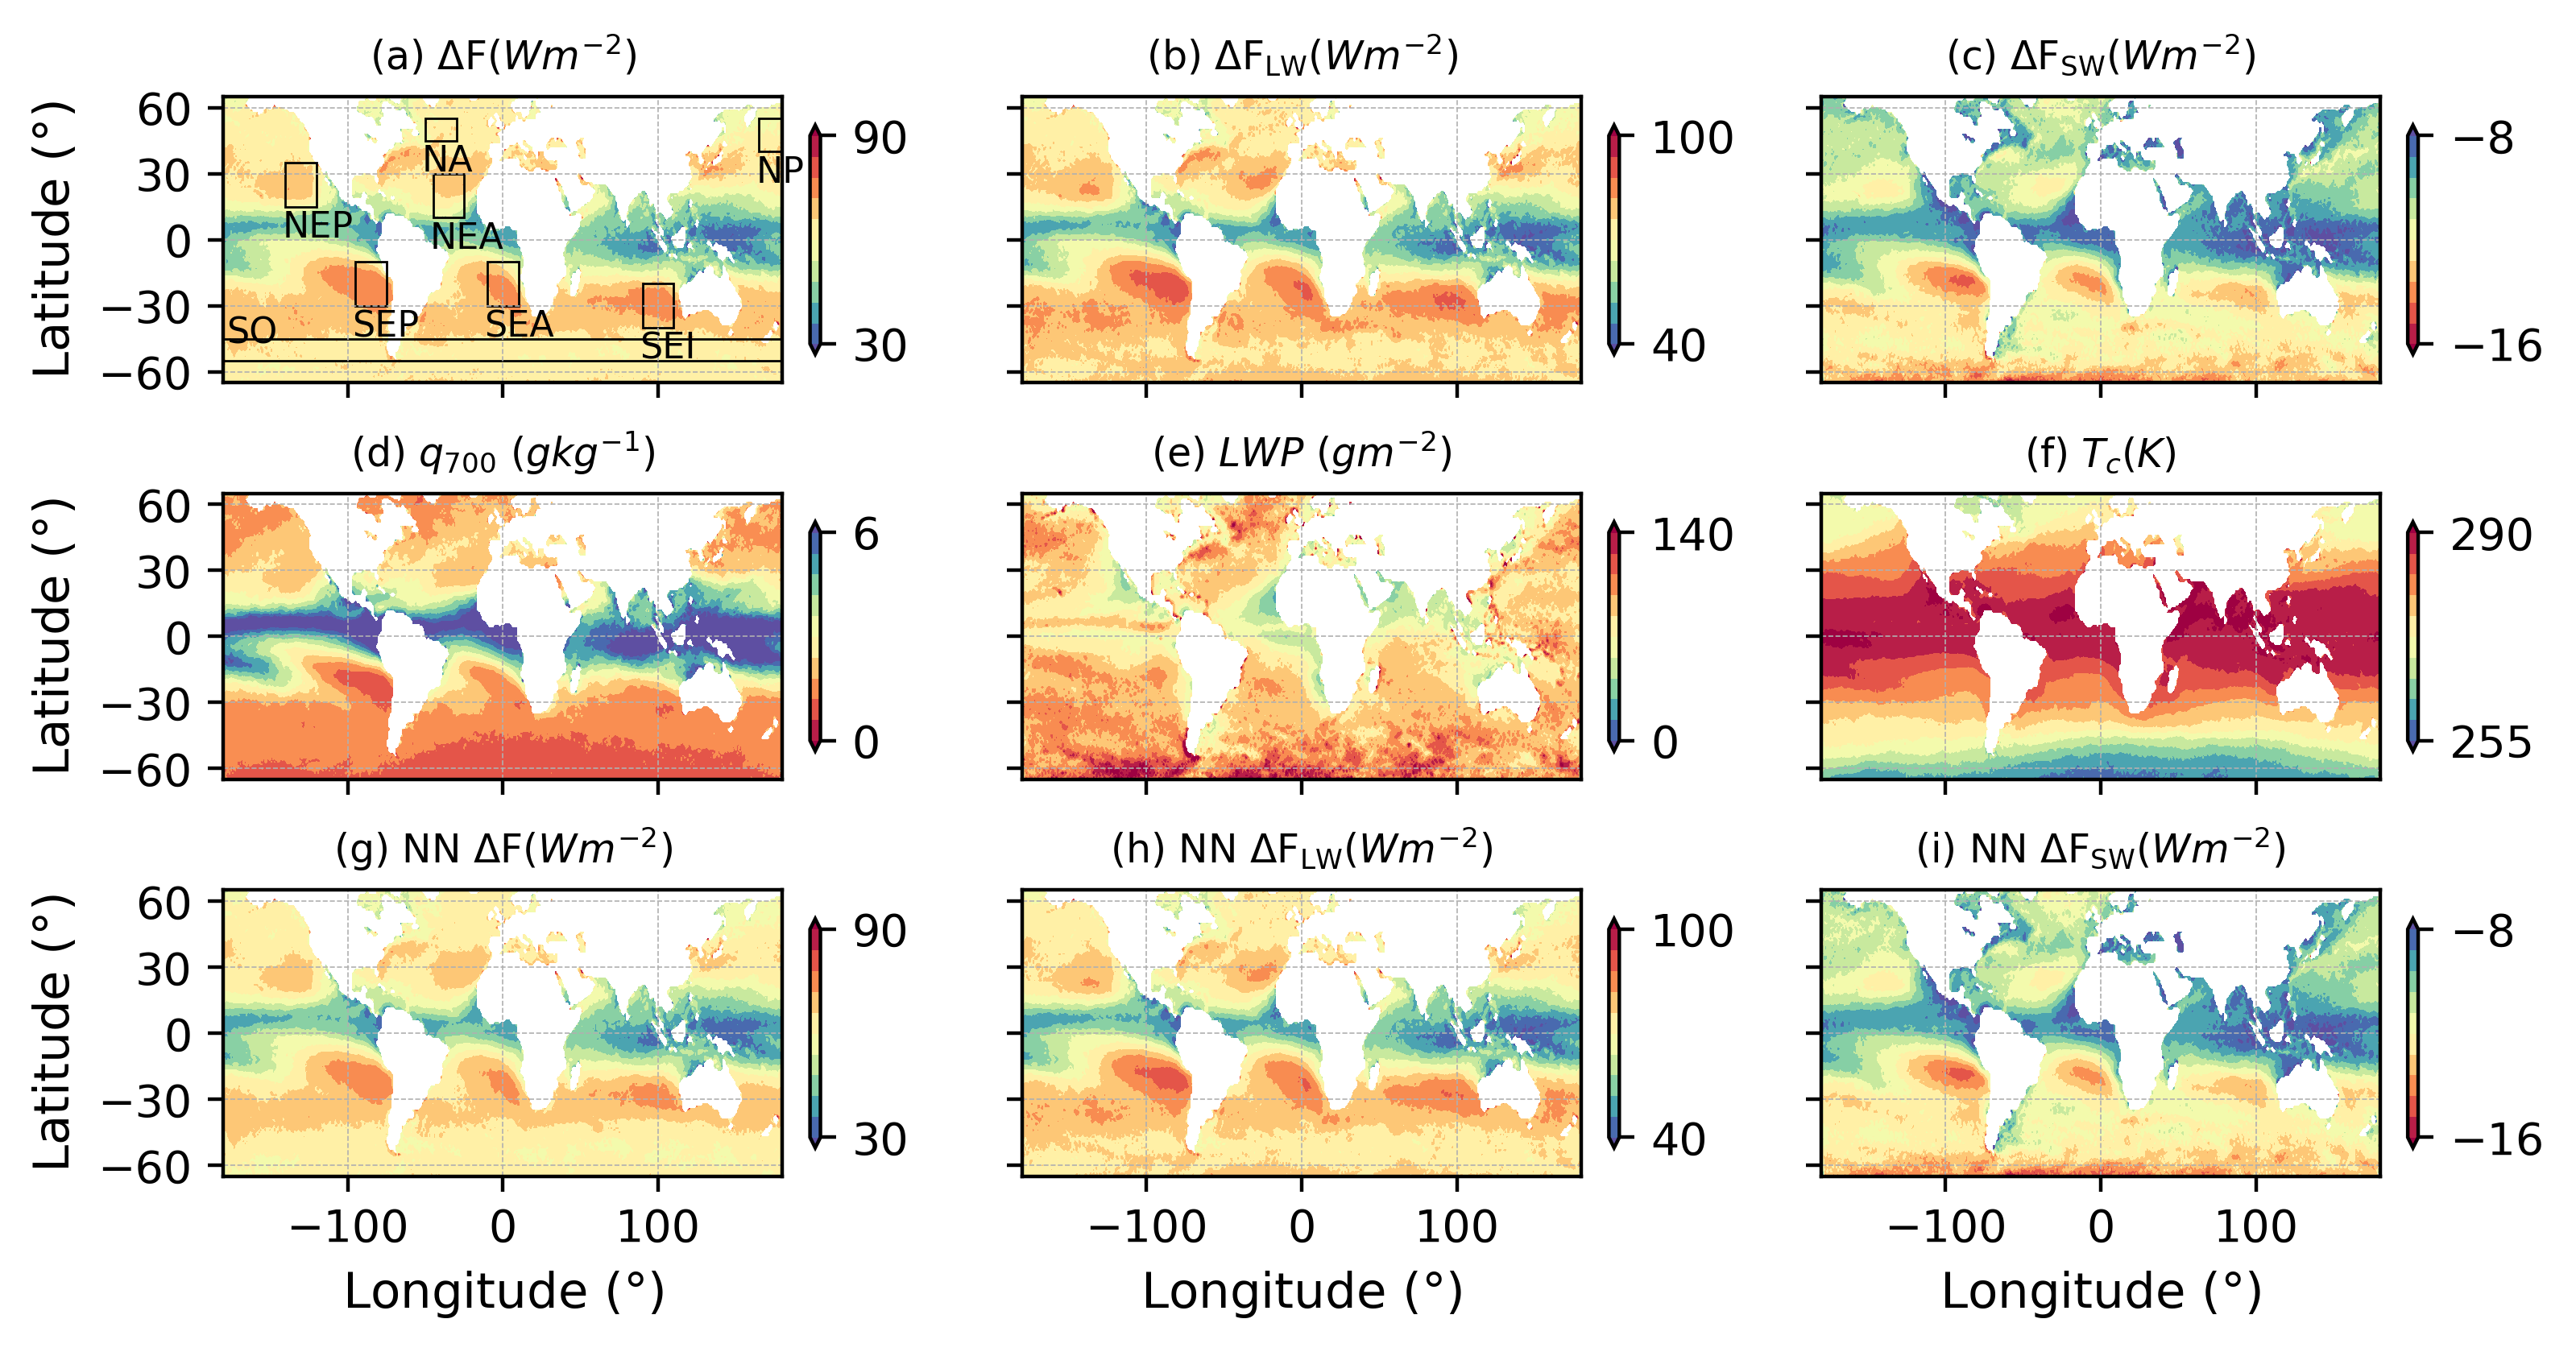

In [4]:
myfontsize = 11

fig, axs = plt.subplots(3,3,figsize=[20/2.54, 10/2.54],
                        sharex = True, sharey = True,
                        dpi = 400)

plt.tight_layout(h_pad = 1.5, w_pad = 0.2)


oax = plt2D(fig, axs[0, 0], f.Longitude,f.Latitude, -(f.LW_cool + f.SW_heat_dmean), '(a) $\mathrm{\Delta F} (W m^{-2}$)', mycmap=cm.Spectral_r, 
      mylevels=np.linspace(30, 90, num=11), 
            ylabel  =True, out = True)

oax = plt2D(fig, axs[0, 1], f.Longitude,f.Latitude, -f.LW_cool, '(b) $\mathrm{\Delta F_{LW}} (W m^{-2}$)', mycmap=cm.Spectral_r, 
      mylevels=np.linspace(40, 100, num=11), 
            out = True)

oax = plt2D(fig, axs[0, 2], f.Longitude,f.Latitude, -f.SW_heat_dmean, '(c) $\mathrm{\Delta F_{SW}} (W m^{-2}$)', mycmap=cm.Spectral, 
      mylevels=np.linspace(-16, -8, num=11), 
            out = True)

oax = plt2D(fig, axs[1,0], f.Longitude,f.Latitude, 1000.*qsatw(f.TMP_700mb.values,700.)*f.RH_700mb.values/100., '(d) $q_{700} \ (gkg^{-1})$', mycmap=cm.Spectral, 
      mylevels=np.linspace(0., 6, num=11), 
            ylabel  =True, out = True)

oax = plt2D(fig, axs[1,1], f.Longitude,f.Latitude, f.LWP, '(e) $LWP \ (gm^{-2})$', mycmap=cm.Spectral_r, 
      mylevels=np.linspace(0, 140, num=11), 
            out = True)

oax = plt2D(fig, axs[1,2], f.Longitude,f.Latitude, f.CTT + 273.15, '(f) $T_c (K)$', mycmap=cm.Spectral_r, 
      mylevels=np.linspace(255, 290, num=11), 
            out = True)
# cs = axs[1,2].contour(f.Longitude,f.Latitude, f.SST, levels = np.linspace(270, 300, num=7), colors = 'black', linewidths = 0.4)
# axs[1,2].clabel(cs, inline=True, fontsize=4, inline_spacing = -20, fmt='%d')

oax = plt2D(fig, axs[2, 0], f0.Longitude,f0.Latitude, -(f0.LW_cool + f0.SW_heat_dmean), '(g) NN $\mathrm{\Delta F} (W m^{-2}$)', mycmap=cm.Spectral_r, 
      mylevels=np.linspace(30, 90, num=11), 
            ylabel  =True,xlabel  =True, out = True)

oax = plt2D(fig, axs[2, 1], f0.Longitude,f0.Latitude, -f0.LW_cool, '(h) NN $\mathrm{\Delta F_{LW}} (W m^{-2}$)', mycmap=cm.Spectral_r, 
      mylevels=np.linspace(40, 100, num=11), 
            out = True,xlabel  =True)

oax = plt2D(fig, axs[2, 2], f0.Longitude,f0.Latitude, -f0.SW_heat_dmean, '(i) NN $\mathrm{\Delta F_{SW}} (W m^{-2}$)', mycmap=cm.Spectral, 
      mylevels=np.linspace(-16, -8, num=11), 
            out = True,xlabel  =True)

for lct in region:
    rect = patches.Rectangle((region[lct][2], region[lct][0]), 
                             region[lct][3] - region[lct][2],
                             region[lct][1] - region[lct][0], linewidth=0.5, edgecolor='black', facecolor='none')
    axs[0, 0].add_patch(rect)
    if lct == 'SO':
        axs[0, 0].text(region[lct][2] + 2 , region[lct][0] + 8, lct, fontsize = 8)
    else:
        axs[0, 0].text(region[lct][2] - 2, region[lct][0] - 14, lct, fontsize = 8)

fig.savefig('Fig1_spatial_pattern.png', dpi=fig.dpi, bbox_inches='tight')